In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# from sklearn import metrics

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold


In [2]:
df = pd.read_csv("loan_data_set.csv")
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


- 79.6% of applicants are males

- 64.8% of applicants are married and 86.68% of them don't have children

- about 15% of applicants are self employed

- 78.2% of applicants are graduates

#### dependent variable is Loan_Status


## visualization

<AxesSubplot:>

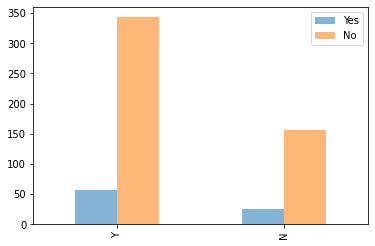

In [4]:
df_selfemployed = df.Loan_Status[df.Self_Employed == 'Yes'].value_counts()

df_nselfemployed = df.Loan_Status[df.Self_Employed == 'No'].value_counts()

df_viz=pd.DataFrame({'Yes' : df_selfemployed , 'No' : df_nselfemployed })

df_viz.plot(kind = 'bar' , alpha = 0.55 , legend = True , stacked = False)

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


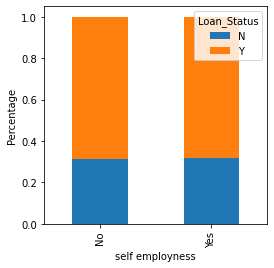

In [5]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Self_Employed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('self employness')
p = plt.ylabel('Percentage')

- self employness doesn't affect on the loan status

<AxesSubplot:>

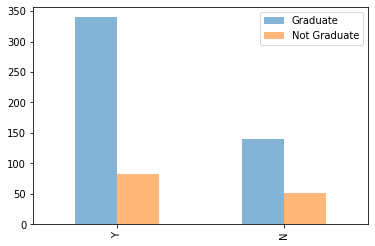

In [6]:
df_graduade = df.Loan_Status[df.Education == 'Graduate'].value_counts()

df_ngraduate = df.Loan_Status[df.Education == 'Not Graduate'].value_counts()

df_viz=pd.DataFrame({'Graduate' : df_graduade , 'Not Graduate' : df_ngraduate })

df_viz.plot(kind = 'bar' , alpha = 0.55 , legend = True , stacked = False)

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


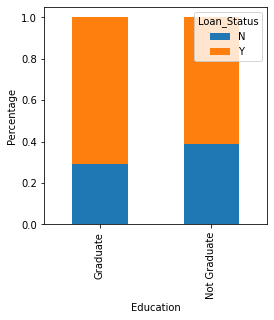

In [7]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education = pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

- proportion of loans getting approved for graduates is higher compared to non-graduates


<AxesSubplot:>

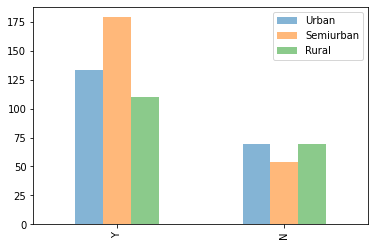

In [8]:
df_urban = df.Loan_Status[df.Property_Area == 'Urban'].value_counts()

df_semiurban = df.Loan_Status[df.Property_Area == 'Semiurban'].value_counts()

df_rural = df.Loan_Status[df.Property_Area == 'Rural'].value_counts()

df_viz=pd.DataFrame({'Urban' : df_urban , 'Semiurban' : df_semiurban , 'Rural' : df_rural})

df_viz.plot(kind = 'bar' , alpha = 0.55 , legend = True , stacked = False)

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


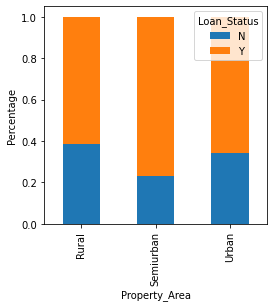

In [9]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Property_Area = pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Property_Area')
p = plt.ylabel('Percentage')

- the loan is accepted for people from semi urban area more than people from urban or rural areas

<AxesSubplot:ylabel='Dependents'>

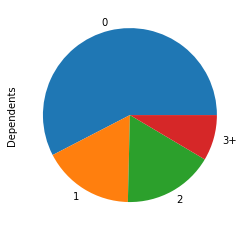

In [10]:
dependents = df['Dependents'].value_counts()
dependents.plot(kind = 'pie')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


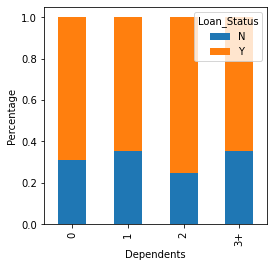

In [11]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))

Dependents = pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

- distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status


Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


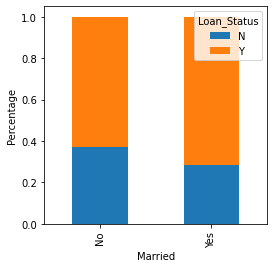

In [12]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

- proportion of married applicants is higher for the approved loans

## creating new features

In [13]:
df['total_income'] = (df['ApplicantIncome'] + df['CoapplicantIncome']).astype('float')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [14]:
df['amount/term'] = (df['LoanAmount'] / df['Loan_Amount_Term']).astype('float')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,amount/term
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,0.197222
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,0.222222
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,0.702778
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,0.519444


In [15]:
bins = [1000,3500,6000,8000,81000]
group = ['Low','Average','High', 'Very high']
df['Income_bin'] = pd.cut(df['total_income'],bins,labels=group)

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN,Average
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,0.197222,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,0.222222,Average
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,0.702778,Very high
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,0.519444,High


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    object  
 2   Married            611 non-null    object  
 3   Dependents         599 non-null    object  
 4   Education          614 non-null    object  
 5   Self_Employed      582 non-null    object  
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    object  
 12  Loan_Status        614 non-null    object  
 13  total_income       614 non-null    float64 
 14  amount/term        578 non-null    float64 
 15  Income_bin         614 non-null    category
dtypes: categ

In [17]:
df.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614,614.000000,578.000000,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,4
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,NaN,NaN,Average
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422,NaN,NaN,283
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN,7024.705081,0.480300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN,6458.663872,0.525459,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN,1442.000000,0.025000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN,4166.000000,0.286111,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN,5416.500000,0.365278,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN,7521.750000,0.513889,NaN


### visualization on the new features

Loan_Status   N    Y
Income_bin          
Low          34   50
Average      77  206
High         39   76
Very high    42   90


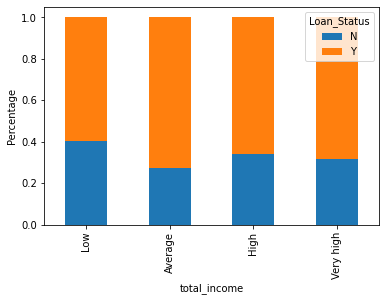

In [18]:
print(pd.crosstab(df['Income_bin'],df['Loan_Status']))

Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('total_income')
P = plt.ylabel('Percentage')

- proportion of applicants with average income is higher for the approved loans 

### handling missing values

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
total_income          0
amount/term          36
Income_bin            0
dtype: int64

In [20]:
df['Dependents'].replace('3+','3', inplace = True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True) #as the top data of this feature is 0

df['Dependents'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    object  
 2   Married            611 non-null    object  
 3   Dependents         614 non-null    object  
 4   Education          614 non-null    object  
 5   Self_Employed      582 non-null    object  
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    object  
 12  Loan_Status        614 non-null    object  
 13  total_income       614 non-null    float64 
 14  amount/term        578 non-null    float64 
 15  Income_bin         614 non-null    category
dtypes: categ

In [21]:
# replacing loan status data

df['Loan_Status'].replace('N',0, inplace = True)

df['Loan_Status'].replace('Y',1, inplace = True)


In [22]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [23]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0,NaN,Average
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,0.355556,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,0.183333,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,0.333333,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,0.391667,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,2900.0,0.197222,Low
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,4106.0,0.222222,Average
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,8312.0,0.702778,Very high
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,7583.0,0.519444,High


In [24]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [25]:
# replacing NaNs

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df.loc[:, df.select_dtypes(include=np.number).columns] = imputer.fit_transform(df.loc[:, df.select_dtypes(include=np.number).columns]) 
df.isna().sum() 

for column in df.select_dtypes(include=object).columns:
    df[column] = df[column].fillna(value=df[column].mode()[0])
    
df    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,1.0,5849.0,0.480300,Average
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0.0,6091.0,0.355556,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1.0,3000.0,0.183333,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1.0,4941.0,0.333333,Average
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1.0,6000.0,0.391667,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,1.0,2900.0,0.197222,Low
610,LP002979,Male,Yes,3,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,1.0,4106.0,0.222222,Average
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,1.0,8312.0,0.702778,Very high
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,1.0,7583.0,0.519444,High


In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
total_income         0
amount/term          0
Income_bin           0
dtype: int64

## remove unneeded columns

In [27]:
df = df.drop(['ApplicantIncome','Loan_ID', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'], axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
0,Male,No,0,Graduate,No,1.0,Urban,1.0,5849.0,0.480300,Average
1,Male,Yes,1,Graduate,No,1.0,Rural,0.0,6091.0,0.355556,High
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1.0,3000.0,0.183333,Low
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1.0,4941.0,0.333333,Average
4,Male,No,0,Graduate,No,1.0,Urban,1.0,6000.0,0.391667,Average
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,1.0,2900.0,0.197222,Low
610,Male,Yes,3,Graduate,No,1.0,Rural,1.0,4106.0,0.222222,Average
611,Male,Yes,1,Graduate,No,1.0,Urban,1.0,8312.0,0.702778,Very high
612,Male,Yes,2,Graduate,No,1.0,Urban,1.0,7583.0,0.519444,High


### correlation

,Credit_History,Loan_Status,total_income,amount/term
Credit_History,1.000000,0.540483,-0.014447,-0.007091
Loan_Status,0.540483,1.000000,-0.031271,-0.014802
total_income,-0.014447,-0.031271,1.000000,0.363796
amount/term,-0.007091,-0.014802,0.363796,1.000000


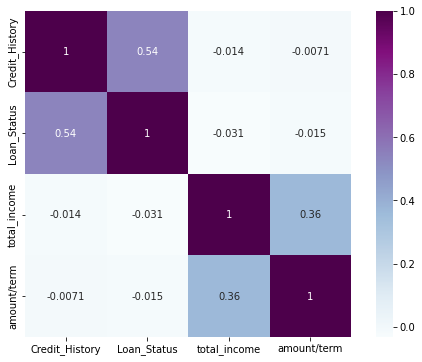

In [28]:
matrix = df.corr()

f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

### check for duplicates

In [29]:
df = df[~df.duplicated(subset=['Gender' ,'total_income', 'amount/term'])]
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
0,Male,No,0,Graduate,No,1.0,Urban,1.0,5849.0,0.480300,Average
1,Male,Yes,1,Graduate,No,1.0,Rural,0.0,6091.0,0.355556,High
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1.0,3000.0,0.183333,Low
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1.0,4941.0,0.333333,Average
4,Male,No,0,Graduate,No,1.0,Urban,1.0,6000.0,0.391667,Average
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,1.0,2900.0,0.197222,Low
610,Male,Yes,3,Graduate,No,1.0,Rural,1.0,4106.0,0.222222,Average
611,Male,Yes,1,Graduate,No,1.0,Urban,1.0,8312.0,0.702778,Very high
612,Male,Yes,2,Graduate,No,1.0,Urban,1.0,7583.0,0.519444,High


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 613
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          613 non-null    object  
 1   Married         613 non-null    object  
 2   Dependents      613 non-null    object  
 3   Education       613 non-null    object  
 4   Self_Employed   613 non-null    object  
 5   Credit_History  613 non-null    float64 
 6   Property_Area   613 non-null    object  
 7   Loan_Status     613 non-null    float64 
 8   total_income    613 non-null    float64 
 9   amount/term     613 non-null    float64 
 10  Income_bin      613 non-null    category
dtypes: category(1), float64(4), object(6)
memory usage: 53.5+ KB


## check for outliers

In [31]:
for col in df.select_dtypes(include = np.number).columns:
    print(f"Skewness of {col} is {df[col].skew()}")

Skewness of Credit_History is -1.9609244312472218
Skewness of Loan_Status is -0.80743683549007
Skewness of total_income is 5.629103033380204
Skewness of amount/term is 9.994343949919168


<AxesSubplot:>

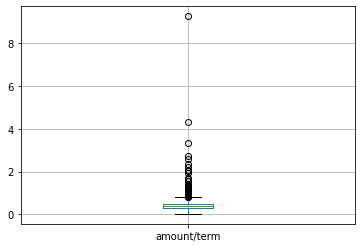

In [32]:
df.boxplot(column='amount/term')

<AxesSubplot:>

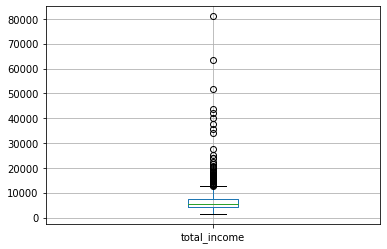

In [33]:
df.boxplot(column='total_income')

In [34]:
from scipy.stats import zscore

def filter_zscore(df, column_name):
    print(f"====== {column_name} ======")
    print(f"Mean of values is: {df[column_name].mean()}")
    print(f"Stanndard Deviation of values is: {df[column_name].std()}\n")
    print(f"length of data before filtering is {len(df)}")        
    filtered = df[(np.abs(zscore(df[column_name], nan_policy='omit')) < 3)]
    print(f"length of data after filtering is {len(filtered)}")
    return filtered.index.tolist()

index_set = set(df.index.tolist())
for col in ["amount/term", "total_income"]:
    index_set = set(filter_zscore(df, col)).intersection(index_set)
#     print(index_set)

df= df.loc[set(index_set)]
df

====== amount/term ======
Mean of values is: 0.4805622571934445
Stanndard Deviation of values is: 0.5101706174607573

length of data before filtering is 613
length of data after filtering is 604
====== total_income ======
Mean of values is: 7028.714388235954
Stanndard Deviation of values is: 6463.173663401807

length of data before filtering is 613
length of data after filtering is 603


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
0,Male,No,0,Graduate,No,1.0,Urban,1.0,5849.0,0.480300,Average
1,Male,Yes,1,Graduate,No,1.0,Rural,0.0,6091.0,0.355556,High
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1.0,3000.0,0.183333,Low
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1.0,4941.0,0.333333,Average
4,Male,No,0,Graduate,No,1.0,Urban,1.0,6000.0,0.391667,Average
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,1.0,2900.0,0.197222,Low
610,Male,Yes,3,Graduate,No,1.0,Rural,1.0,4106.0,0.222222,Average
611,Male,Yes,1,Graduate,No,1.0,Urban,1.0,8312.0,0.702778,Very high
612,Male,Yes,2,Graduate,No,1.0,Urban,1.0,7583.0,0.519444,High


## feature scaling


### normalization

In [35]:
# from sklearn.preprocessing import Normalizer

# scaler = Normalizer(norm="l1")

# df.loc[:, df.select_dtypes(include=np.number).columns] = scaler.fit_transform(df.loc[:, df.select_dtypes(include=np.number).columns]) 
# df

### standard


In [36]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# df.loc[:, df.select_dtypes(include=np.number).columns] = scaler.fit_transform(df.loc[:, df.select_dtypes(include=np.number).columns]) 
# df

### min-max scaler

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df.loc[:, df.select_dtypes(include=np.number).columns] = scaler.fit_transform(df.loc[:, df.select_dtypes(include=np.number).columns]) 

df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
0,Male,No,0,Graduate,No,1.0,Urban,1.0,0.187102,0.269522,Average
1,Male,Yes,1,Graduate,No,1.0,Rural,0.0,0.197376,0.195678,High
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1.0,0.066146,0.093728,Low
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1.0,0.148552,0.182523,Average
4,Male,No,0,Graduate,No,1.0,Urban,1.0,0.193513,0.217054,Average
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,1.0,0.061900,0.101950,Low
610,Male,Yes,3,Graduate,No,1.0,Rural,1.0,0.113102,0.116749,Average
611,Male,Yes,1,Graduate,No,1.0,Urban,1.0,0.291670,0.401222,Very high
612,Male,Yes,2,Graduate,No,1.0,Urban,1.0,0.260720,0.292694,High


## Encoding Categorical Features

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

for col in df.columns:
    if df[col].dtypes !='int32' or 'int64' or 'float64':
        df[col]=encoder.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 613
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          597 non-null    int32
 1   Married         597 non-null    int32
 2   Dependents      597 non-null    int32
 3   Education       597 non-null    int32
 4   Self_Employed   597 non-null    int32
 5   Credit_History  597 non-null    int64
 6   Property_Area   597 non-null    int32
 7   Loan_Status     597 non-null    int64
 8   total_income    597 non-null    int64
 9   amount/term     597 non-null    int64
 10  Income_bin      597 non-null    int32
dtypes: int32(7), int64(4)
memory usage: 39.6 KB


In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
0,1,0,0,0,0,2,2,1,318,130,0
1,1,1,1,0,0,2,0,0,331,88,1
2,1,1,0,0,1,2,2,1,42,24,2
3,1,1,0,1,0,2,2,1,236,80,0
4,1,0,0,0,0,2,2,1,325,102,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2,0,1,31,28,2
610,1,1,3,0,0,2,0,1,133,36,0
611,1,1,1,0,0,2,2,1,432,176,3
612,1,1,2,0,0,2,2,1,412,142,1


In [48]:
#  scaling

scaler = MinMaxScaler()

df[['total_income','amount/term']] = scaler.fit_transform(df[['total_income','amount/term']])
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income,amount/term,Income_bin
0,1,0,0,0,0,2,2,1,0.591078,0.575221,0
1,1,1,1,0,0,2,0,0,0.615242,0.389381,1
2,1,1,0,0,1,2,2,1,0.078067,0.106195,2
3,1,1,0,1,0,2,2,1,0.438662,0.353982,0
4,1,0,0,0,0,2,2,1,0.604089,0.451327,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2,0,1,0.057621,0.123894,2
610,1,1,3,0,0,2,0,1,0.247212,0.159292,0
611,1,1,1,0,0,2,2,1,0.802974,0.778761,3
612,1,1,2,0,0,2,2,1,0.765799,0.628319,1


## train-test split

In [49]:
from sklearn.model_selection import train_test_split

x,y = df.iloc[:,df.columns != 'Loan_Status'] , df["Loan_Status"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.17,random_state=42)

x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,total_income,amount/term,Income_bin
463,0,0,1,1,0,2,1,0.475836,0.407080,0
340,1,1,3,1,0,2,0,0.267658,0.579646,0
80,0,0,0,0,0,2,1,0.213755,0.300885,0
256,1,0,0,1,0,0,0,0.607807,0.323009,1
498,1,1,1,0,1,2,1,0.055762,0.221239,2


### logestic regression

In [50]:
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=5, random_state=None)

logreg = LogisticRegression()

acc_score = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index, :], x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
     
    logreg.fit(X_train, Y_train)
    pred_values = logreg.predict(X_val)
     
    acc = accuracy_score(pred_values , Y_val)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/5

print("Avg accuracy:",avg_acc_score*100)
print("logistic regression has accuracy of:",(logreg.score(x_test,y_test))*100)


Avg accuracy: 79.79797979797979
logistic regression has accuracy of: 82.35294117647058


## decision tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

acc_score = []
for train_index , test_index in kf.split(x_train):
    X_train , X_test = x_train.iloc[train_index, :], x_train.iloc[test_index,:]
    Y_train , Y_test = y_train.iloc[train_index] , y_train.iloc[test_index]
     
    dtc.fit(X_train, Y_train)
    pred_values = dtc.predict(X_test)
     
    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)
    
    y_pred=logreg.predict(X_test)

avg_acc_score = sum(acc_score)/5

print("Avg accuracy:",avg_acc_score*100)
print("decision tree has accuracy:", dtc.score(x_test, y_test)*100)

Avg accuracy: 69.0909090909091
decision tree has accuracy: 69.6078431372549


### Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

acc_score = []
for train_index , test_index in kf.split(x_train):
    X_train , X_test = x_train.iloc[train_index, :], x_train.iloc[test_index,:]
    Y_train , Y_test = y_train.iloc[train_index] , y_train.iloc[test_index]
     
    rf.fit(X_train, Y_train)
    pred_values = rf.predict(X_test)
     
    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)
    
    y_pred=logreg.predict(X_test)

avg_acc_score = sum(acc_score)/5

y_pred = rf.predict(x_test)

print("Avg accuracy:",avg_acc_score*100)
print("Random Forest classifier has accuracy of: ", rf.score(x_test, y_test)*100)

Avg accuracy: 78.18181818181819
Random Forest classifier has accuracy of:  81.37254901960785


In [59]:
from sklearn.model_selection import GridSearchCV
from time import perf_counter

params = dict()
params['n_estimators'] = list(range(1, 10))
params['max_features'] = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
params['max_depth'] = list(range(1, 10))
params['min_samples_split'] = list(range(10, 20))

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, n_jobs=-1)
start_time = perf_counter()
gs.fit(x_train, y_train)
end_time = perf_counter()

print("Best Score:", gs.best_score_*100)
print("Best Hyperparameters:", gs.best_params_)
print("Grid Search Time is: %f seconds" % (end_time-start_time))

Best Score: 82.02020202020202
Best Hyperparameters: {'max_depth': 1, 'max_features': 0.65, 'min_samples_split': 11, 'n_estimators': 2}
Grid Search Time is: 92.126852 seconds


In [72]:
rf_2 = RandomForestClassifier(max_depth= 7, max_features= 0.6, min_samples_split= 16, n_estimators= 6)
total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    rf_2.fit(X_train, Y_train)
    Y_pred = rf_2.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc*100)

print(rf_2.score(x_test,y_test)*100)

79.39393939393938
85.29411764705883


### SVM

In [69]:
from sklearn import svm
from sklearn.svm import SVC

clf = svm.SVC(kernel='rbf')

acc_score = []
for train_index , test_index in kf.split(x_train):
    X_train , X_test = x_train.iloc[train_index, :], x_train.iloc[test_index,:]
    Y_train , Y_test = y_train.iloc[train_index] , y_train.iloc[test_index]
     
    clf.fit(X_train, Y_train)
    pred_values = clf.predict(X_test)
     
    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/5

print("Avg accuracy:",avg_acc_score*100)
print('Support Vector Machine Model w/ 3-Fold CV:', clf.score(x_test, y_test)*100)

Avg accuracy: 81.41414141414141
Support Vector Machine Model w/ 3-Fold CV: 82.35294117647058


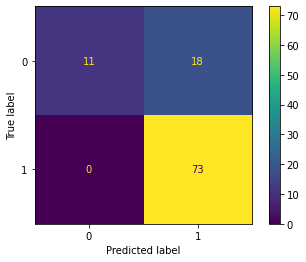

In [70]:
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

### K nearest neighbour

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

acc_score = []
for train_index , test_index in kf.split(x_train):
    X_train , X_test = x_train.iloc[train_index, :], x_train.iloc[test_index,:]
    Y_train , Y_test = y_train.iloc[train_index] , y_train.iloc[test_index]
     
    knn.fit(X_train, Y_train)
    pred_values = knn.predict(X_test)
     
    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)
    
    y_pred=knn.predict(X_test)

avg_acc_score = sum(acc_score)/5

print("Avg accuracy:",avg_acc_score*100)
print(f"Accuracy of KNN is {knn.score(x_test, y_test)*100}")

Avg accuracy: 75.15151515151514
Accuracy of KNN is 78.43137254901961


In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = dict()
params['n_neighbors'] = list(range(1, 21, 2))
params['weights'] = ['uniform', 'distance']
params['metric'] = ['euclidean', 'manhattan', 'minkowski']

# define search
gs = GridSearchCV(KNeighborsClassifier(), param_grid=params, n_jobs=1)
gs.fit(X_train, Y_train)

print("Best Score:", gs.best_score_*100)
print("Best Hyperparameters:", gs.best_params_)

### ensampling voting

In [74]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('logestic reg', logreg), ('random forest', rf_2),
                                ('svm', clf)  , ('knn', knn)]
                        , voting='hard', weights=[1,2, 1, 1 ]) 

eclf.fit(x_train, y_train)
print(eclf.score(x_test, y_test)*100)


84.31372549019608
